In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
!pip install torch torchvision dominate visdom
%cd /kaggle/working/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2619, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 2619 (delta 33), reused 20 (delta 20), pack-reused 2549 (from 2)
Receiving objects: 100% (2619/2619), 8.29 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (1621/1621), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
import shutil

src_folder = "/kaggle/input/seadronessee-mot-sampled-dataset/images/val"
dst_folder = "datasets/rgb2ir/testA"
os.makedirs(dst_folder, exist_ok=True)

threshold = 49339  # Only copy files with number > this

for filename in os.listdir(src_folder):
    name, ext = os.path.splitext(filename)
    
    # Skip non-numeric filenames
    if not name.isdigit():
        continue
    
    # Check the numeric part
    if int(name) > threshold:
        src_path = os.path.join(src_folder, filename)
        dst_path = os.path.join(dst_folder, filename)
        shutil.copy2(src_path, dst_path)

print(f"✅ Copied all images with filename > {threshold} to: {dst_folder}")

✅ Copied all images with filename > 49339 to: datasets/rgb2ir/testA


In [3]:
!mkdir -p datasets/rgb2ir/testB
!cp $(ls datasets/rgb2ir/testA | head -n 1 | xargs -I{} echo datasets/rgb2ir/testA/{}) datasets/rgb2ir/testB/

ls: write error: Broken pipe


In [4]:
!mkdir /kaggle/working/pytorch-CycleGAN-and-pix2pix/checkpoints
!mkdir /kaggle/working/pytorch-CycleGAN-and-pix2pix/checkpoints/rgb2ir
!cp /kaggle/input/cycle-gan-for-rgb2ir/pytorch/default/2/latest_net_D_A.pth /kaggle/working/pytorch-CycleGAN-and-pix2pix/checkpoints/rgb2ir
!cp /kaggle/input/cycle-gan-for-rgb2ir/pytorch/default/2/latest_net_D_B.pth /kaggle/working/pytorch-CycleGAN-and-pix2pix/checkpoints/rgb2ir
!cp /kaggle/input/cycle-gan-for-rgb2ir/pytorch/default/2/latest_net_G_A.pth /kaggle/working/pytorch-CycleGAN-and-pix2pix/checkpoints/rgb2ir
!cp /kaggle/input/cycle-gan-for-rgb2ir/pytorch/default/2/latest_net_G_B.pth /kaggle/working/pytorch-CycleGAN-and-pix2pix/checkpoints/rgb2ir

In [5]:
!python test.py --dataroot ./datasets/rgb2ir \
  --name rgb2ir \
  --model cycle_gan \
  --phase test \
  --epoch latest \
  --no_dropout \
  --num_test 20000 \
  --results_dir ./results

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

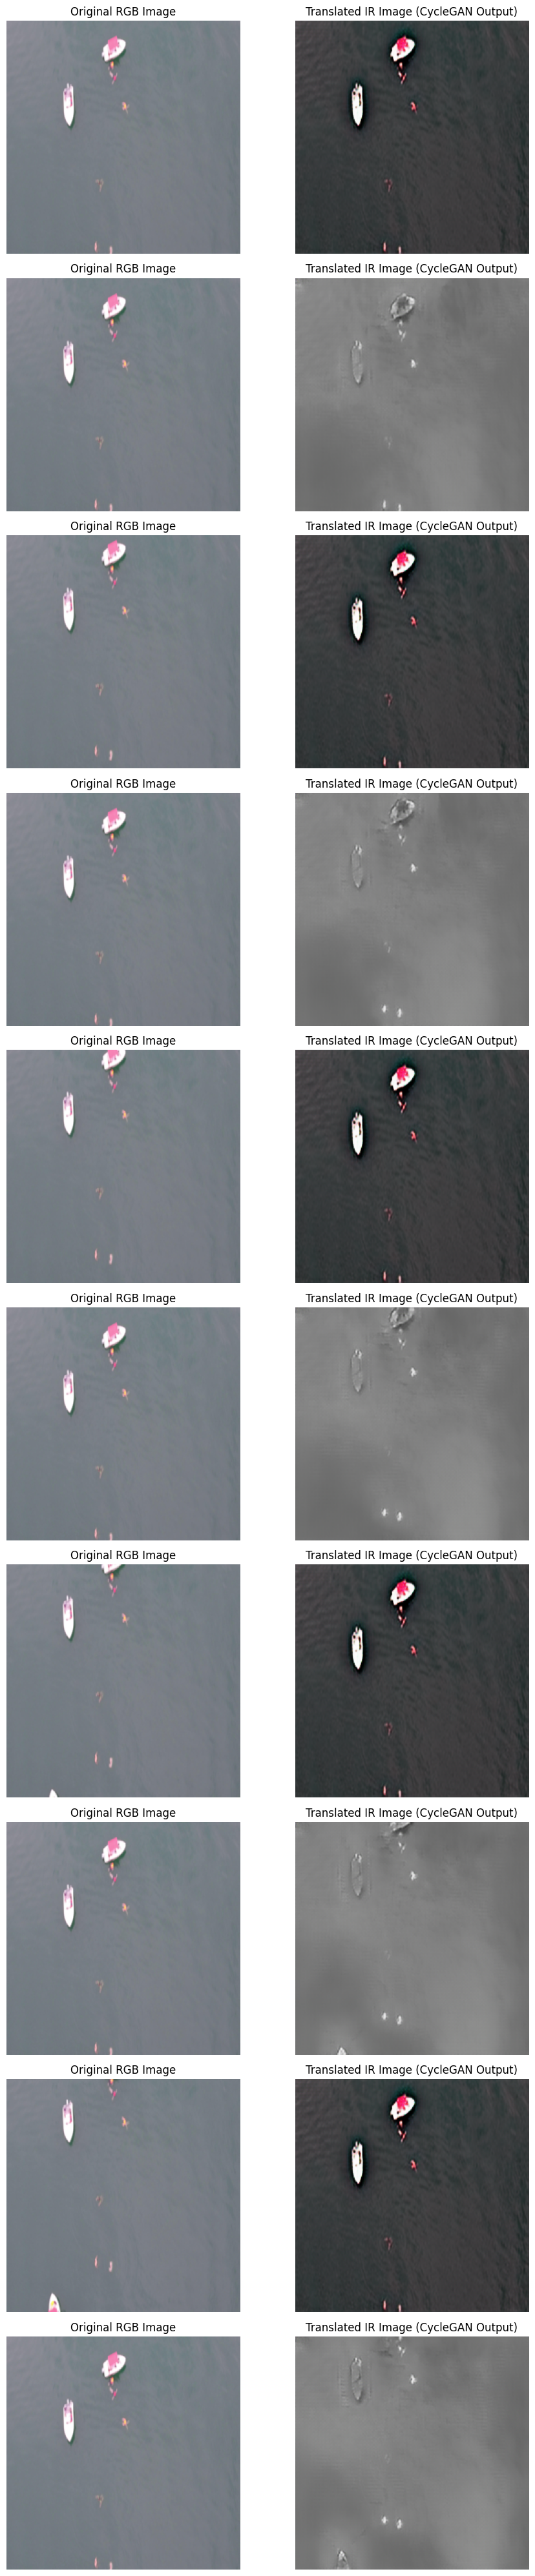

In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the generated results
results_dir = "./results/rgb2ir/test_latest/images"

# List all images generated by CycleGA
# They are usually saved as "XXX_fake.png", "XXX_real.png", etc.
all_images = sorted(os.listdir(results_dir))

# Filter only the fake (IR) and real (RGB) image pairs
fake_imgs = [f for f in all_images if "fake" in f]
real_imgs = [f for f in all_images if "real" in f]

# Visualize a few pairs
num_samples = min(10, len(fake_imgs))  # show up to 5 samples

plt.figure(figsize=(10, 4 * num_samples))

for i in range(num_samples):
    rgb_path = os.path.join(results_dir, real_imgs[i])
    ir_path = os.path.join(results_dir, fake_imgs[i])

    rgb_img = Image.open(rgb_path)
    ir_img = Image.open(ir_path)

    # Show original RGB
    plt.subplot(num_samples, 2, 2 * i + 1)
    plt.imshow(rgb_img)
    plt.title("Original RGB Image")
    plt.axis("off")

    # Show Translated IR
    plt.subplot(num_samples, 2, 2 * i + 2)
    plt.imshow(ir_img)
    plt.title("Translated IR Image (CycleGAN Output)")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [7]:
!zip -r output.zip ./results/rgb2ir

  adding: results/rgb2ir/ (stored 0%)
  adding: results/rgb2ir/test_latest/ (stored 0%)
  adding: results/rgb2ir/test_latest/index.html (deflated 98%)
  adding: results/rgb2ir/test_latest/images/ (stored 0%)
  adding: results/rgb2ir/test_latest/images/50145_rec_B.png (deflated 0%)
  adding: results/rgb2ir/test_latest/images/51339_fake_A.png (deflated 0%)
  adding: results/rgb2ir/test_latest/images/51207_rec_B.png (deflated 0%)
  adding: results/rgb2ir/test_latest/images/50213_real_B.png (deflated 0%)
  adding: results/rgb2ir/test_latest/images/51110_real_A.png (deflated 0%)
  adding: results/rgb2ir/test_latest/images/50004_real_A.png (deflated 0%)
  adding: results/rgb2ir/test_latest/images/50692_rec_A.png (deflated 0%)
  adding: results/rgb2ir/test_latest/images/50068_rec_B.png (deflated 0%)
  adding: results/rgb2ir/test_latest/images/50553_rec_A.png (deflated 0%)
  adding: results/rgb2ir/test_latest/images/51128_rec_A.png (deflated 0%)
  adding: results/rgb2ir/test_latest/images/5084